<a href="https://colab.research.google.com/github/shramanb/ai/blob/main/deepNNforRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 Build a Deep Neural Network for Regression.

## Import library and create dataframe out of the dataset

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
insurance =  pd.read_csv("drive/MyDrive/Notebooks/AI/Assignments/insurance.csv")
print("Total Data Instances : {}".format(insurance.shape[0]))
print("Toatl Columns Instances : {}".format(insurance.shape[1]))

Total Data Instances : 1338
Toatl Columns Instances : 7


In [ ]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Deleting any Duplicate Row

In [ ]:
#Finding Duplicate Rows
duplicate = insurance[insurance.duplicated(subset=None, keep=False)]

print("Duplicate Rows :")
duplicate

Duplicate Rows :


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
# Deleting duplicate rows and creating new dataframe
noDupDF = insurance.drop_duplicates(subset=None, keep='first')

In [ ]:
# Checking to make sure , there are no duplicate data
duplicate = noDupDF[noDupDF.duplicated(subset=None, keep=False)]

print("Duplicate Rows :")
duplicate

Duplicate Rows :


,age,sex,bmi,children,smoker,region,charges


## Normalization of Data

In [ ]:
df = noDupDF

In [ ]:
#Standardization of data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

#Label Encoder Gender and Smoker
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
# Spliting data into Features and Targets
X = df.iloc[:,0:6].values
y = df.iloc[:,6].values

In [ ]:
X

array([[19, 0, 27.9, 0, 1, 'southwest'],
       [18, 1, 33.77, 1, 0, 'southeast'],
       [28, 1, 33.0, 3, 0, 'southeast'],
       ...,
       [18, 0, 36.85, 0, 0, 'southeast'],
       [21, 0, 25.8, 0, 0, 'southwest'],
       [61, 0, 29.07, 0, 1, 'northwest']], dtype=object)

In [ ]:
# One Hot Encoder for Categorical Columns Region
from sklearn.compose import make_column_transformer

onehotencoder = make_column_transformer((OneHotEncoder(), [5]), remainder='passthrough')
X = onehotencoder.fit_transform(X)


In [ ]:
X.shape

(1337, 9)

In [ ]:
X

array([[0.0, 0.0, 0.0, ..., 27.9, 0, 1],
       [0.0, 0.0, 1.0, ..., 33.77, 1, 0],
       [0.0, 0.0, 1.0, ..., 33.0, 3, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 36.85, 0, 0],
       [0.0, 0.0, 0.0, ..., 25.8, 0, 0],
       [0.0, 1.0, 0.0, ..., 29.07, 0, 1]], dtype=object)

In [ ]:
#Removing the extra dummy variable
X = X[:, 1:]

In [ ]:
X.shape

(1337, 8)

## Split the data into the features (i.e. X) and the target (i.e. y) . Use a 70-30 train-test split.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1234)

In [ ]:
# Standardizing Features
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [ ]:
#Number of instances and Columns in train Set
X_train.shape
print("Total Instances in Train Set : {}".format(X_train.shape[0]))
print("Total Columns in Train Set : {}".format(X_train.shape[1]))

Total Instances in Train Set : 935
Total Columns in Train Set : 8


## Build Deep Neural Network for Regression

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

#Units = 6, Hidden Layer = 6, r = 0.005,  Optimzer= SGD
#Defining the model
#model = tf.keras.models.Sequential()

#Adding  Layer
#model.add(tf.keras.layers.Dense(units=128, input_shape=[8]))
#model.add(tf.keras.layers.Dense(units=64, activation='relu'))

#Adding Second Layer
#model.add(tf.keras.layers.Dense(units=16, activation='relu'))
#model.add(tf.keras.layers.Dense(units=128))

#Adding Output Layer
#model.add(tf.keras.layers.Dense(units=64))

#model.compile(optimizer=tf.keras.optimizers.SGD(0.2), loss='mse')

#r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

#plt.plot(r.history['loss'])

In [ ]:
!pip install scikeras[tensorflow]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Hyperparameter tuning of Neural Network
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
#from scikeras.wrappers import KerasClassifier

def buildNN():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=64, input_shape=[8]))

    model.add(tf.keras.layers.Dense(units=1))

    model.compile(loss='mse', metrics=['accuracy'])

    return model


In [ ]:
regressor = KerasRegressor(model = buildNN, verbose=0)
parameters = {'batch_size':[32,16,8],
              'epochs':[100,150],
              'optimizer':['adam','rmsprop','sgd'],
              'optimizer__learning_rate':[0.0001,0.001,0.1, 0.2]}

In [ ]:
%%time
grid_search = GridSearchCV(estimator =regressor, param_grid=parameters, scoring='neg_mean_squared_error',cv=10)
grid_search = grid_search.fit(X_train, y_train)


CPU times: user 2h 1min 52s, sys: 7min 53s, total: 2h 9min 45s
Wall time: 2h 7min 18s


In [ ]:
print("Best Classification Performace : ")
print(grid_search.best_params_)

Best Classification Performace : 
{'batch_size': 8, 'epochs': 150, 'optimizer': 'adam', 'optimizer__learning_rate': 0.0001}


Running Keras Regressor with GridSearchCV to find the best Network and result is ADAM, with batch size 8 and learning_rate 0.0001. However, it is taking long time to execute with epochs 150. As I increase the epochs , it is taking more time due to its computation and iteration.


#Part 2 Use the model to perform prediction on the following customer

In [ ]:
# Importing Library and initilizing dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Loading the dataset
dataset = pd.read_csv('drive/MyDrive/Notebooks/AI/customers.csv')

## Splitting data into Features and Target

In [ ]:
X = dataset.iloc[:,3:13].values
y = dataset.iloc[:,13].values

In [ ]:
print(X)
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


## Normalizing data

In [ ]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Label Encoding Gender
labelencoder_X = LabelEncoder()
X[:, 2] = labelencoder_X.fit_transform(X[:, 2])

In [ ]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [ ]:
#Dealing with the categorical Geography column
from sklearn.compose import make_column_transformer

onehotencoder = make_column_transformer((OneHotEncoder(), [1]), remainder='passthrough')

X = onehotencoder.fit_transform(X)

In [ ]:
X.shape

(10000, 12)

In [ ]:
#Removing the extra dummy variable
X = X[:, 1:]

In [ ]:
X.shape

(10000, 11)

In [ ]:
X

array([[0.0, 0.0, 619, ..., 1, 1, 101348.88],
       [0.0, 1.0, 608, ..., 0, 1, 112542.58],
       [0.0, 0.0, 502, ..., 1, 0, 113931.57],
       ...,
       [0.0, 0.0, 709, ..., 0, 1, 42085.58],
       [1.0, 0.0, 772, ..., 1, 0, 92888.52],
       [0.0, 0.0, 792, ..., 1, 0, 38190.78]], dtype=object)

## Splitting Data into Training and test Set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


## Standardizing features


In [ ]:
#Normalizing the features
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
X_test.shape[1]

11

## Building the Model

In [ ]:
import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential()

In [ ]:
model.add(tf.keras.layers.Dense(units=6, input_shape=[11], activation='relu'))
#model.add(tf.keras.layers.Dropout(0.1))

#Adding a second hidden layer
model.add(tf.keras.layers.Dense(units=6, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.1))

#Adding an output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
250/250 [==============================] - 3s 7ms/step - loss: 0.5781 - accuracy: 0.7480 - val_loss: 0.5095 - val_accuracy: 0.7890
Epoch 2/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4755 - accuracy: 0.7981 - val_loss: 0.4705 - val_accuracy: 0.7890
Epoch 3/100
250/250 [==============================] - 2s 7ms/step - loss: 0.4494 - accuracy: 0.7981 - val_loss: 0.4549 - val_accuracy: 0.7890
Epoch 4/100
250/250 [==============================] - 1s 6ms/step - loss: 0.4381 - accuracy: 0.7983 - val_loss: 0.4480 - val_accuracy: 0.7900
Epoch 5/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4326 - accuracy: 0.7972 - val_loss: 0.4439 - val_accuracy: 0.7880
Epoch 6/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4289 - accuracy: 0.7995 - val_loss: 0.4406 - val_accuracy: 0.7935
Epoch 7/100
250/250 [==============================] - 1s 5ms/step - loss: 0.4257 - accuracy: 0.8075 - val_loss: 0.4365 - val_accuracy: 0.8080

In [ ]:
# Evaluate the model, prints loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

250/250 [==============================] - 1s 2ms/step - loss: 0.3267 - accuracy: 0.8646
Train score: [0.3267200291156769, 0.8646249771118164]
63/63 [==============================] - 0s 1ms/step - loss: 0.3507 - accuracy: 0.8530
Test score: [0.3506631851196289, 0.8529999852180481]


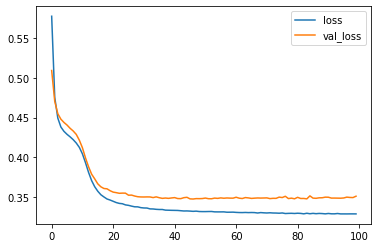

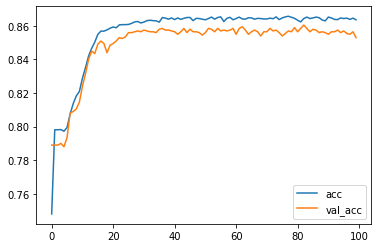

In [ ]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

## Test Data to predict the customer


In [ ]:
#test_sample_data = [['600','France', 'Male','40','3','60000', '2','Yes','Yes','50000']]

#Normalizing
test_sample_data = [[0.0, 0.0,600,1,40,3,60000,2,1,1,50000]]

In [ ]:
X_tsd = sc_X.transform(test_sample_data)

In [ ]:
X_tsd.shape

(1, 11)

In [ ]:
# Precting the customer
model.predict(X_tsd)

array([[0.02222022]], dtype=float32)

In [ ]:
#Finding the predict Class
np.argmax(model.predict(X_tsd))

0

# Part 3 Perform classification with a deep neural network and Predict the user Actions.

In [ ]:
# Importing Library and initilizing dataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#Loading the dataset
onlineStore = pd.read_csv('drive/MyDrive/Notebooks/AI/Assignments/onlineStore.csv')

In [ ]:
onlineStore.head()

,is_mobile,n_products_viewed,visit_duration,is_returning_visitor,time_of_day,user_action
0,1,0,0.657510,0,3,0
1,1,1,0.568571,0,2,1
2,1,0,0.042246,1,1,0
3,1,1,1.659793,1,1,2
4,0,1,2.014745,1,1,2


## Split data into Features and Targets

In [ ]:
X = onlineStore.iloc[:,0:5].values
y = onlineStore.iloc[:,5].values

In [ ]:
X.shape

(500, 5)

In [ ]:
#Dealing with the categorical time_of_day  column
from sklearn.compose import make_column_transformer

onehotencoder = make_column_transformer((OneHotEncoder(), [4]), remainder='passthrough')

X = onehotencoder.fit_transform(X)

In [ ]:
X.shape

(500, 8)

In [ ]:
# Droping Dummy Varaible
X = X[:, 1:]

In [ ]:
X.shape

(500, 7)

In [ ]:
X

array([[0.        , 0.        , 1.        , ..., 0.        , 0.65750995,
        0.        ],
       [0.        , 1.        , 0.        , ..., 1.        , 0.56857123,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.042246  ,
        1.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.1728534 ,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.2099644 ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 2.61688195,
        1.        ]])

In [ ]:
# Spliting data into Train Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

## Standardizing the Fetures

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [ ]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (400, 7)
X_test.shape: (100, 7)


## Building Model

In [ ]:
pd.unique(y)

array([0, 1, 2, 3])

### Hyperparameter tuning of Neural Network

In [ ]:
!pip install scikeras[tensorflow]

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Defining the model
def buildNN():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(units=32, input_shape=[7], activation='relu'))
  model.add(tf.keras.layers.Dropout(0.1))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.1))
  model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

  #Compile Modle
  model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model


In [ ]:
classifier = KerasClassifier(model = buildNN)

parameters = {'batch_size': [32, 64], 'epochs' :[10,15], 'optimizer': ['adam', 'RMSprop' ,'sgd']}

grid_search = GridSearchCV(estimator =classifier, param_grid=parameters, scoring='accuracy', cv=10)
grid_search = grid_search.fit(X_train, y_train)

best_param = grid_search.best_params_
best_acc=grid_search.best_score_



In [ ]:
print("Best Classification Performace : ")
print(best_param)
print(best_acc)

Best Classification Performace : 
{'batch_size': 32, 'epochs': 15, 'optimizer': 'sgd'}
0.8099999999999999


### Building Best Classification performance based on different Architectures

SGD model with batch size of 32 is performing better than any other in given architectures. Increasing number of Neurons and hidden layers seems to be improving performance in any optimizer respectively. Accuracy is up till 92 if i increase units to 128. Since this is classification problem, we are going with ReLU as activation for hidden layers and “softmax” for output layers.

In [ ]:
# Constructing the Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=32, input_shape=[7]),

    tf.keras.layers.Dense(units=32, activation='relu'),

    tf.keras.layers.Dense(4, activation='softmax')])

# Comile the Model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

# Train the Model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, verbose=0)

# Evaluate the model, prints loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

13/13 [==============================] - 0s 2ms/step - loss: 0.6888 - accuracy: 0.7350
Train score: [0.6887827515602112, 0.7350000143051147]
4/4 [==============================] - 0s 3ms/step - loss: 0.7176 - accuracy: 0.7400
Test score: [0.7176075577735901, 0.7400000095367432]
